<a href="https://colab.research.google.com/github/lanyu0322/pedestrian_firstdraft_figures/blob/master/Figure_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd

try:
  import geopandas as gp
except:
  !pip install geopandas

import pyproj
from matplotlib import pyplot as plt
from shapely.geometry import Point

# camera location

In [ ]:
# -- read in the camera data
camera_fname = os.path.join("drive", "My Drive", "lwir", "data", "nycdot", 
                            "cams_ft_wd.feather")
camera = pd.read_feather(camera_fname)

# -- extract just the counts from weekdays
camarr = camera.drop(columns=["cam_id", "lat", "lon"]).values

In [ ]:
# -- set indices of cameras that don't have 3-peak behavior
bind = [0, 5, 8, 11, 13, 19, 36, 45, 48, 51, 52, 60, 62, 63, 66, 67, 68, 69, 
        74, 79, 80, 81, 89, 93, 94, 98, 99, 103, 104, 106, 110, 113, 114, 115, 
        121, 125, 137, 138, 139, 146, 151]
camdf = camera[~camera.index.isin(bind)].copy()
camdrop = camera[camera.index.isin(bind)].copy()

In [ ]:
#    (Borough geojson from: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm)
bpath = os.path.join("drive", "My Drive", "lwir", "data", "boro_boundaries")
bname = "Borough Boundaries.geojson"
boros = gp.read_file(os.path.join(bpath, bname))
boros = boros[boros.boro_name == "Manhattan"]

# -- set the parks geometries file name
dpath = os.path.join("drive", "My Drive", "lwir", "data", "parks", "properties")
fname = "geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp"

<Figure size 432x288 with 0 Axes>

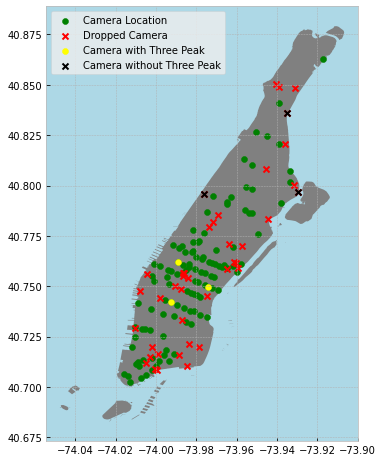

In [ ]:
fig = plt.figure()

# -- load the parks geometries and convert to NY State Plane
# parks = gp.read_file(os.path.join(dpath, fname))
# parks_m = parks[parks.borough == "M"]

# -- plot it
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor("lightblue")
boros.plot(color="grey", ax=ax, legend=True)
#parks_m.plot(color="orange", ax=ax, legend=True)

ax.scatter(camdf.lon, camdf.lat, color="green", label='Camera Location')
ax.scatter(camdrop.lon, camdrop.lat, marker="x", color="red", label='Dropped Camera')
sc = ax.scatter(camera.iloc[23]["lon"], camera.iloc[23]["lat"], color = "yellow", marker="o", label='Camera with Three Peak')
sc = ax.scatter(camera.iloc[41]["lon"], camera.iloc[41]["lat"], color = "yellow")
sc = ax.scatter(camera.iloc[82]["lon"], camera.iloc[82]["lat"], color = "yellow")
sc = ax.scatter(camera.iloc[115]["lon"], camera.iloc[115]["lat"], color = "black",  marker="x", label='Camera without Three Peak')
sc = ax.scatter(camera.iloc[114]["lon"], camera.iloc[114]["lat"], color = "black",  marker="x")
sc = ax.scatter(camera.iloc[51]["lon"], camera.iloc[51]["lat"], color = "black",  marker="x")
ax.legend(loc='upper left')
#plt.title("Enclosed Park Area in Manhattan")

outfile = os.path.join("drive", "My Drive", "lwir", "output","figure1", "dropped Camera Location in Manhattan.png")
fig.savefig(outfile)

# raw data

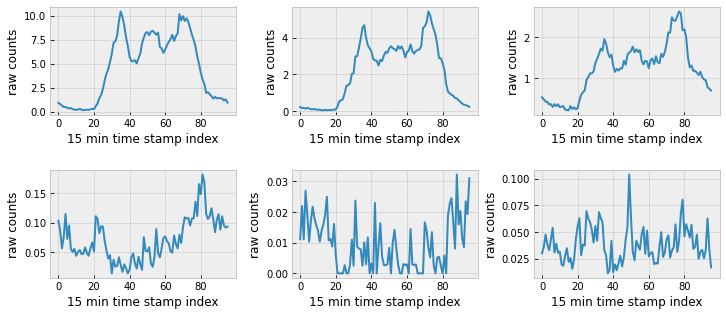

In [ ]:
plt.style.use("bmh")
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[12, 8])
fig.subplots_adjust(hspace=0.5, wspace =0.3)


plt.subplot(3, 3, 1)
plt.plot(camarr[23])
plt.xlabel('15 min time stamp index')
plt.ylabel('raw counts')

plt.subplot(3, 3, 2)
plt.plot(camarr[41])
plt.xlabel('15 min time stamp index')
plt.ylabel('raw counts')

plt.subplot(3, 3, 3)
plt.plot(camarr[82])
plt.xlabel('15 min time stamp index')
plt.ylabel('raw counts')

plt.subplot(3, 3, 4)
plt.plot(camarr[115])
plt.xlabel('15 min time stamp index')
plt.ylabel('raw counts')

plt.subplot(3, 3, 5)
plt.plot(camarr[114])
plt.xlabel('15 min time stamp index')
plt.ylabel('raw counts')

plt.subplot(3, 3, 6)
plt.plot(camarr[51])
plt.xlabel('15 min time stamp index')
plt.ylabel('raw counts')

rawfile = os.path.join("drive", "My Drive", "lwir", "output","figure1", "raw_data")
fig.savefig(rawfile)